In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('D:\\technocalobs\\Bigmart\\train.csv')
df = pd.read_csv('D:\\technocalobs\\Bigmart\\test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df.shape

(5681, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
categorical_data = df.select_dtypes(include=[object])
print("count of categiorical features in the dataset: ",categorical_data.shape[1])
numerical_data = df.select_dtypes(include=[np.float64,np.int64])
print("count of numerical features in the dataset: ",numerical_data.shape[1])

count of categiorical features in the dataset:  7
count of numerical features in the dataset:  4


In [8]:
categorical_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


<Axes: xlabel='Outlet_Size', ylabel='count'>

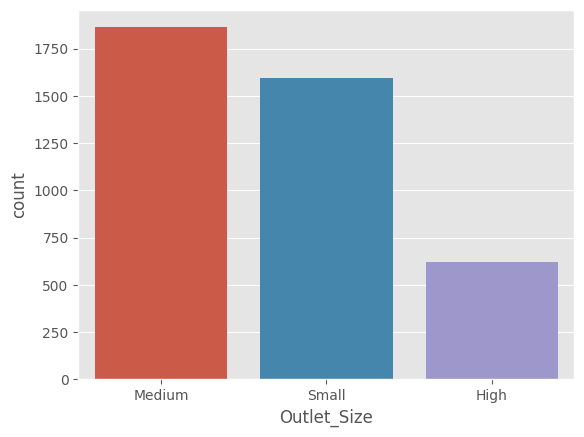

In [9]:
sns.countplot(x='Outlet_Size', data=categorical_data)

In [10]:
categorical_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [12]:
categorical_data['Outlet_Size'] = categorical_data['Outlet_Size'].fillna(categorical_data['Outlet_Size'].mode()[0])

In [13]:
categorical_data.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

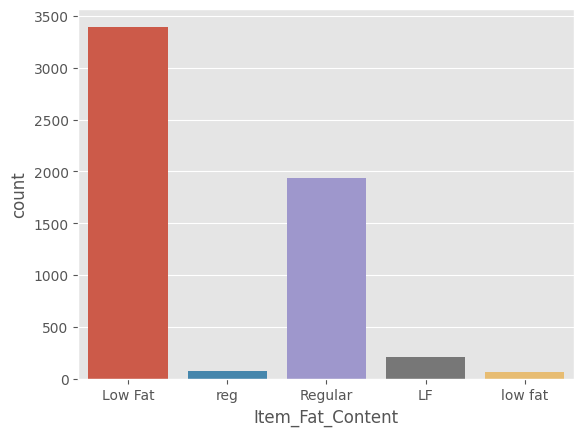

In [14]:
sns.countplot(x='Item_Fat_Content', data = categorical_data)

In [15]:
categorical_data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}}, inplace=True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

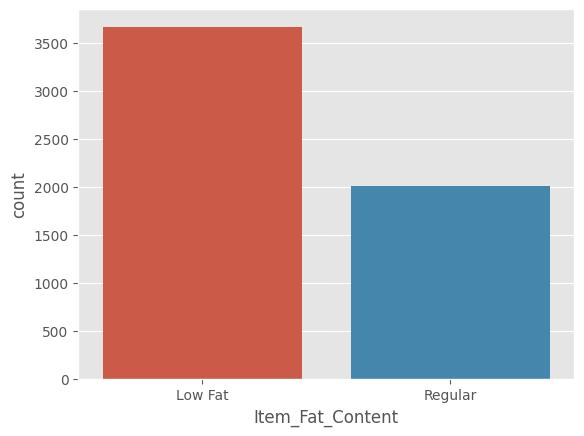

In [16]:
sns.countplot(x='Item_Fat_Content', data = categorical_data)

<Axes: xlabel='count', ylabel='Outlet_Identifier'>

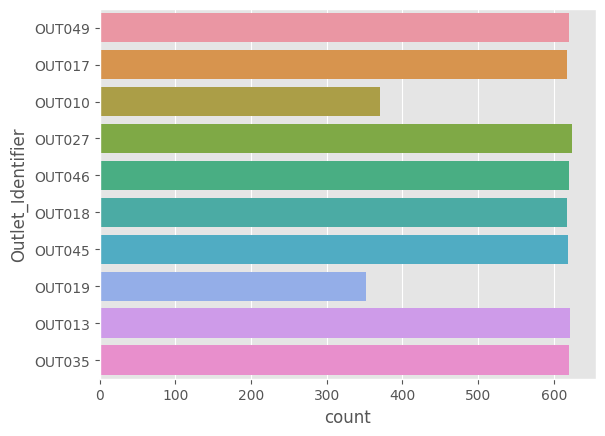

In [17]:
sns.countplot(y='Outlet_Identifier', data = categorical_data)

In [18]:
categorical_data['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item_Type'>

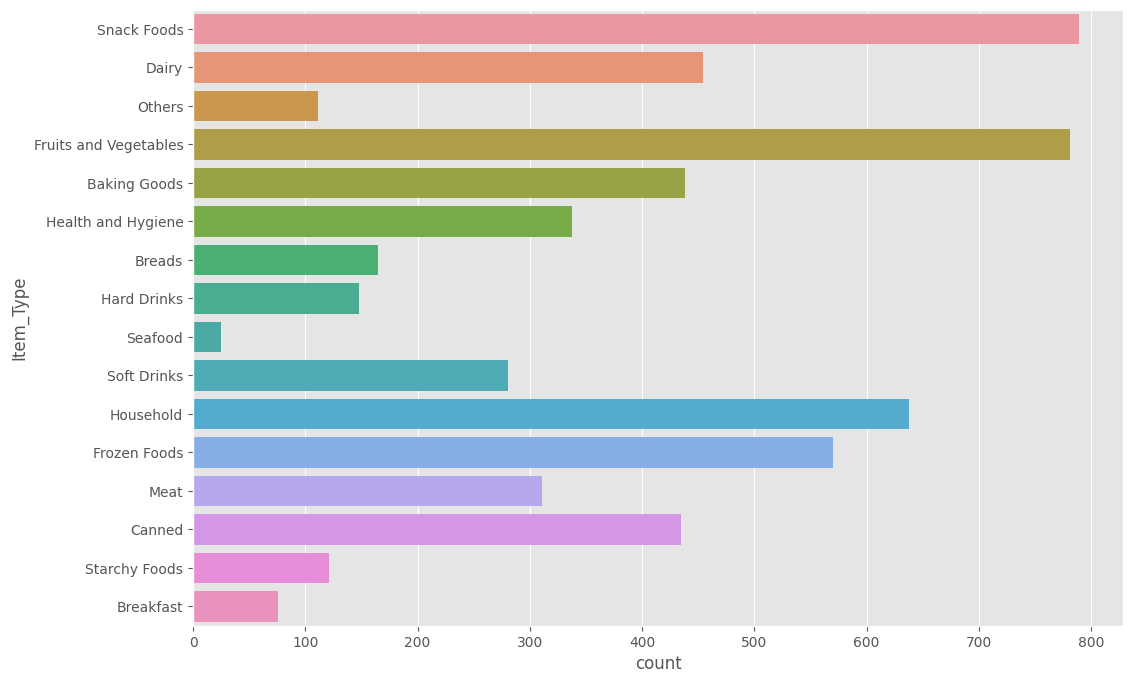

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(y='Item_Type', data= categorical_data)

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

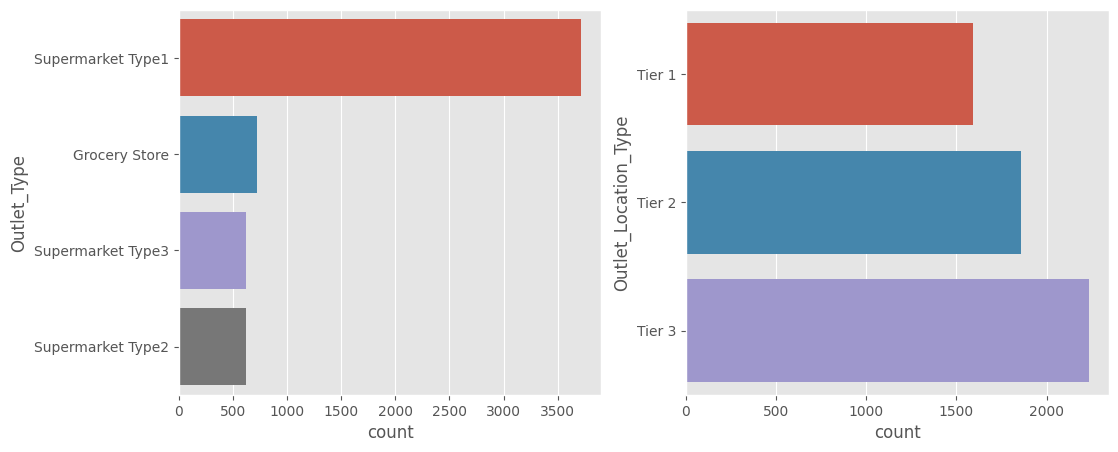

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(y='Outlet_Type', data = categorical_data, ax= axes[0])
sns.countplot(y='Outlet_Location_Type', data = categorical_data, ax= axes[1])

In [21]:
numerical_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<Axes: >

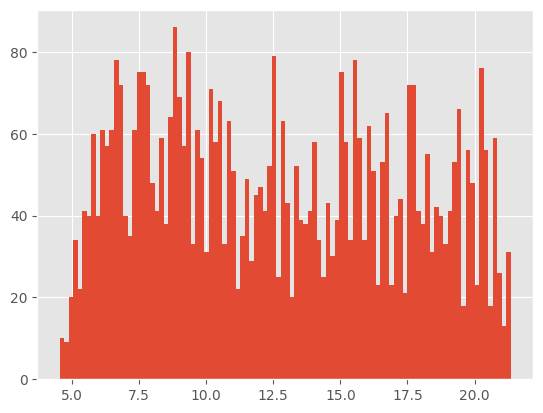

In [22]:
numerical_data['Item_Weight'].hist(bins=100)

<Axes: >

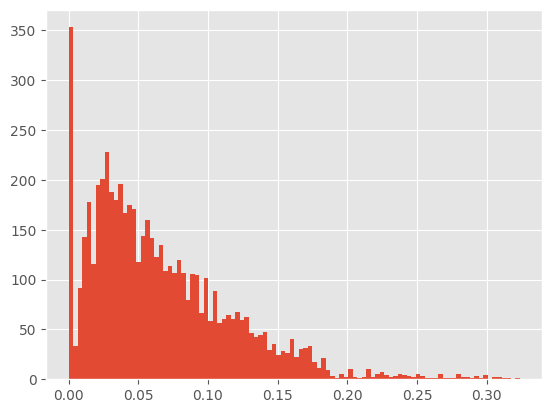

In [23]:
numerical_data['Item_Visibility'].hist(bins=100)

<Axes: >

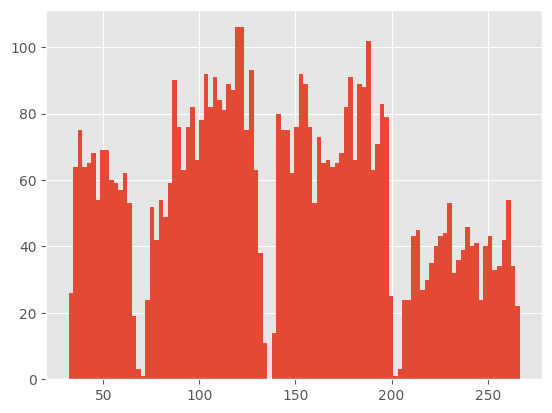

In [24]:
numerical_data['Item_MRP'].hist(bins=100)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

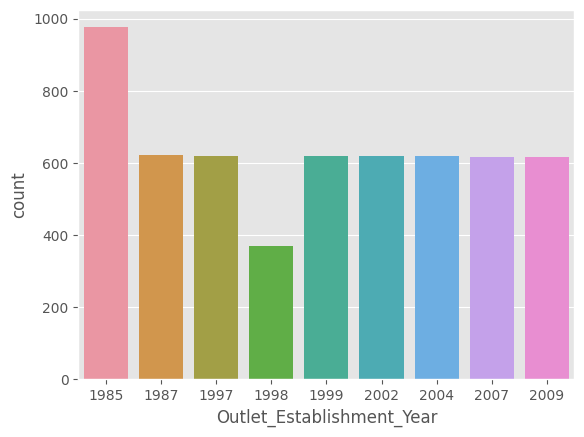

In [25]:
sns.countplot(x='Outlet_Establishment_Year', data=numerical_data)

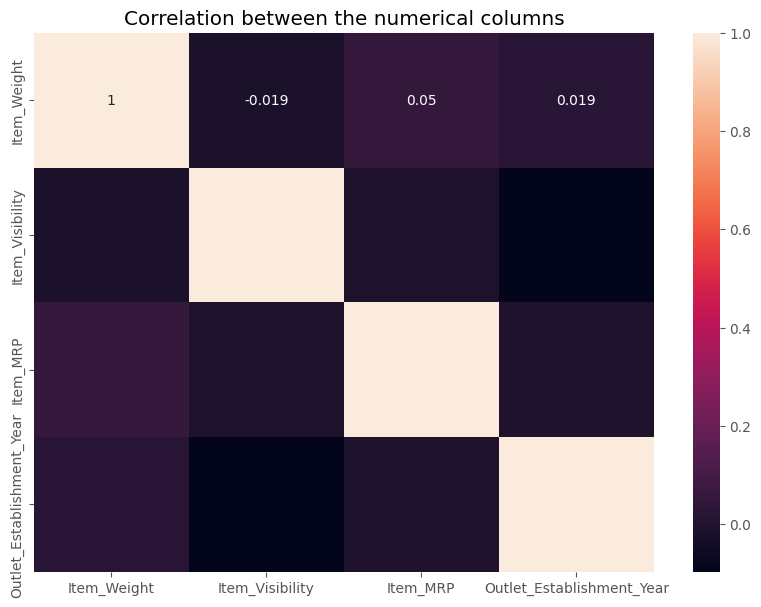

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.title('Correlation between the numerical columns')
plt.show()